In [10]:
import matplotlib.pyplot as plt
from pickle import load, dump
import numpy as np
from scipy.stats import t

path = "C:/Users/a.rojasa55/OneDrive - Universidad de los Andes/Documentos/MOPTA-23/Results/"
#path = "C:/Users/ari_r/OneDrive - Universidad de los Andes/Documentos/MOPTA-23/Results/"

In [11]:
file = open(path+"Feasible_Configurations","rb")
configs = load(file); file.close()

K = {}
for sc in range(25):
    file = open(f"C:/Users/a.rojasa55/OneDrive - Universidad de los Andes/Documentos/MOPTA-23/Data/K/K_sc{sc}","rb")
    K[sc] = len(load(file)); file.close()

In [33]:
''' Configs plot '''
def plot_configs(data,K,SL=None,conf_level=0.95):
    feasible = []

    fig, ax = plt.subplots(figsize=(8,5))
    
    costs = [i/100 for i in range(35)]
    for c in range(1,36):
        
        sls = np.array([(K[sc]-data[sc][c][1])/K[sc] for sc in range(25)])
        mu = np.mean(sls); sigma = np.std(sls,ddof=1)

        if mu >= 1:
            col="gold"; mark = "D"; feasible.append(c-1)
        else:
            col = "darkmagenta"; mark = "o"
            df = 25-1
            sem = sigma/5
            ci_lower, ci_upper = t.interval(conf_level, df, loc=mu, scale=sem)
            ax.vlines(x=[costs[c-1]],ymin=ci_lower,ymax=ci_upper,color=col)

        ax.plot(costs[c-1],mu,linestyle="",marker=mark,color=col)
    
    ax.set_ylabel("Expected Service Level", fontsize=14, fontname="Century Gothic")
    ax.set_xlabel("\nExpected driving and charging cost \n relative to minimum cost stations configuration",fontsize=14,fontname="Century Gothic")

    for tick in ax.get_xticklabels(): tick.set_fontname("Cambria")
    for tick in ax.get_yticklabels(): tick.set_fontname("Cambria")

    ax.set_xlim(-0.02,0.37)
    ax.set_ylim(0.989, 1.001)

    xticks = [i/100 for i in range(0,36,5)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:.0%}".format(i) for i in xticks],fontsize=14)

    yticks = [0.99+i/1000 for i in range(0,11,2)]
    ax.set_yticks(yticks)
    ax.set_yticklabels(["{:.1%}".format(i) for i in yticks],fontsize=14)

    return feasible
    

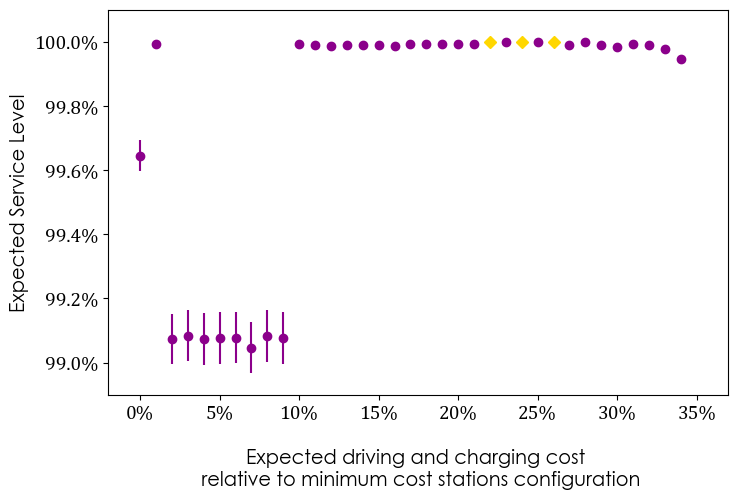

In [34]:
feasible = plot_configs(configs,K)

In [36]:
open_stats = {}
stress_ix = {}

for i in range(35):
    file = open(path + f"Configurations/Open Stations/open_stations_{i}", "rb")
    open_stats[i] = load(file); file.close()

    file = open(path + f"Configurations/Stress Index/stress_index_{i}", "rb")
    stress_ix[i] = load(file); file.close()


In [37]:
def plot_stress(open_stats,stress_ix,feasible,conf_level=0.95):
    fig, ax = plt.subplots(figsize=(8,5))
    
    for i in range(35):
        stress = [sum(stress_ix[i][sc][s] for s in open_stats[i])/len(open_stats[i]) for sc in range(25)]
        mu = np.mean(stress); sigma = np.std(stress, ddof=1)
        df = 25-1
        sem = sigma/5
        ci_lower, ci_upper = t.interval(conf_level, df, loc=mu, scale=sem)

        if i in feasible:
            mark = "D"; col = "gold"
        else:
            mark = "o"; col = "navy"

        ax.plot(i/100,mu,marker=mark,color=col)
        ax.vlines(x=i/100,ymin=ci_lower,ymax=ci_upper,color=col)

    
    ax.set_ylabel("Expected Stations Stress Index", fontsize=14, fontname="Century Gothic")
    ax.set_xlabel("\nExpected driving and charging cost \n relative to minimum cost stations configuration",fontsize=14,fontname="Century Gothic")

    for tick in ax.get_xticklabels(): tick.set_fontname("Cambria")
    for tick in ax.get_yticklabels(): tick.set_fontname("Cambria")

    ax.set_xlim(-0.02,0.37)
    #ax.set_ylim(0.989, 1.001)

    xticks = [i/100 for i in range(0,36,5)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:.0%}".format(i) for i in xticks],fontsize=14)

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

    #yticks = [0.99+i/1000 for i in range(0,11,2)]
    #ax.set_yticks(yticks)
    #ax.set_yticklabels(["{:.1%}".format(i) for i in yticks],fontsize=14)

C:\Users\a.rojasa55\AppData\Local\Temp\ipykernel_17416\3958060218.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


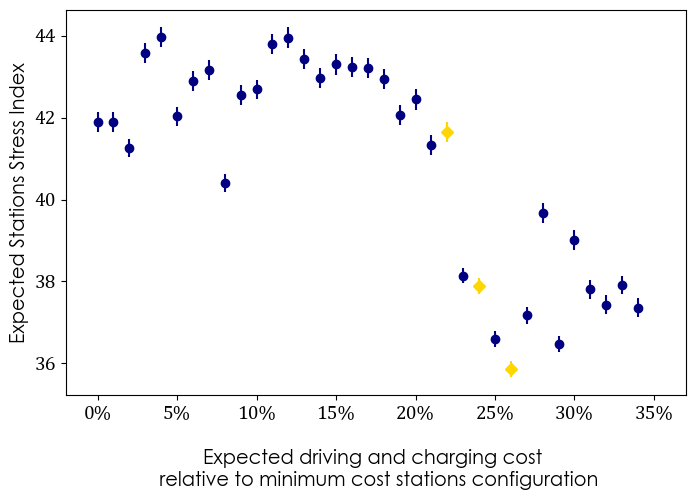

In [38]:
plot_stress(open_stats,stress_ix,feasible)